In [24]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
 
# Read Images
# img = mpimg.imread('polyRoots.png')
# print(np.shape(img))
# display(img)
dim = 16263 * 23000
img2 = np.reshape(img,(dim,4)).T
print(np.shape(img2))
display(img2)
# print(np.sum(img2[0]))
# print(np.sum(img2[1]))
# print(np.sum(img2[2]))
going = True
ind = 0
check1 = 0
# while (check1 <5):
#     if (img2[2][ind] > 0.):
#         print(img2[0][ind], img2[1][ind], img2[2][ind])
# #         print(img2[1][ind])
# #         print(img2[2][ind])
#         check1 +=1
# #         going = False
#     ind +=1
print(np.unique(img2[0]))
print(np.unique(img2[1]))
# Output Images
# plt.imshow(img)

(4, 374049000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

[0.         0.47058824 0.7607843  0.8666667  0.92941177 0.972549
 0.99215686 0.99607843 1.        ]
[0.         0.05490196 0.11764706 0.19215687 0.30588236 0.42745098
 0.56078434 0.654902   0.7411765  1.        ]


Shape: (1800, 1800)


<IPython.core.display.Javascript object>


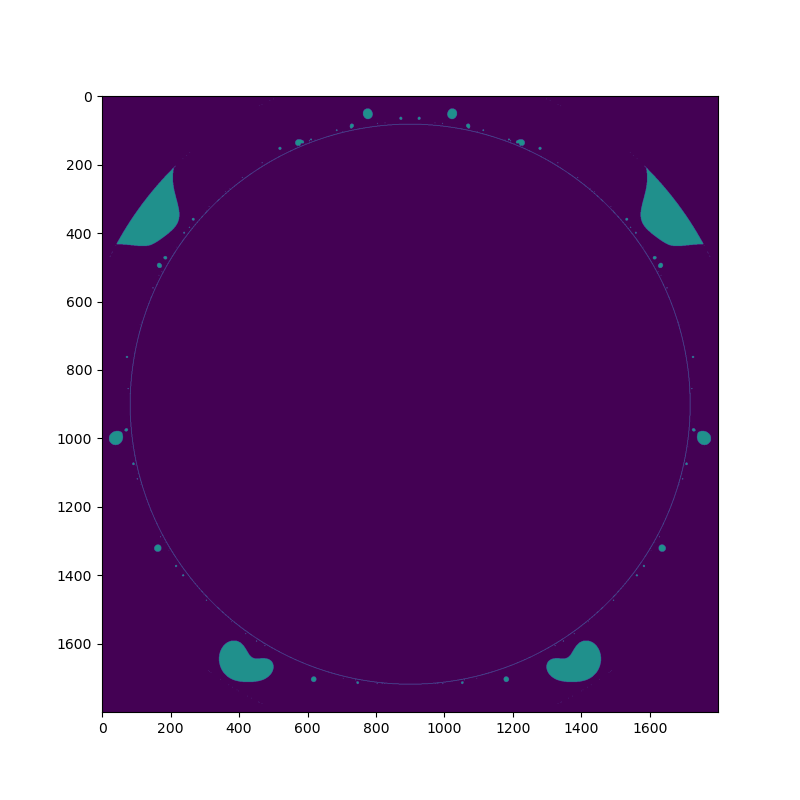

Total runtime: 5.082102399999712


In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import matplotlib
import random
import csv

## FILES ARE NAMED ACCORDINGLY
# test2 - 10.
# test3 - 5.
# test4 - 1.
# test5 - 0.5
# test6 - 0.1
# test7 - 0.05

# test21 - 40
# test22 - 20
# test23 - 10
# test24 - 5
# test25 - 1

start = time.perf_counter()

def getData2(file,size):
    newData = np.empty((size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row[0]
            rowNum += 1
    print("Shape:", np.shape(newData))
    print("First Row:", newData[0])
    print(np.sum(newData))
    newData2 = np.reshape(newData, (side,side))
    return newData2

def getData3(file,size):
    newData = np.empty((size,size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row
            rowNum += 1
    print("Shape:", np.shape(newData))
#     print("First Row:", newData[0])
#     print(np.sum(newData))
#     newData2 = np.reshape(newData, (side,side))
    return newData

def combineData2x2(data,sideLen):
    newData = np.empty((sideLen//2,sideLen//2))
    for x in range(0,sideLen//2):
        for y in range(0,sideLen//2):
            newBin = data[2*x][2*y] + data[(2*x) +1][2*y] + data[2*x][(2*y) +1] + data[(2*x) +1][(2*y) +1]
            newData[x][y] = newBin
    return newData

def combineData3x3(data,sideLen):
    newData = np.empty((sideLen//3,sideLen//3))
    for x in range(0,sideLen//3):
        for y in range(0,sideLen//3):
            newBin = data[3*x][3*y] + data[3*x][(3*y) +1] + data[3*x][(3*y) +2] \
                    +data[(3*x) +1][3*y] + data[(3*x) +1][(3*y) +1] + data[(3*x) +1][(3*y) +2]\
                    +data[(3*x) +2][3*y] + data[(3*x) +2][(3*y) +1] + data[(3*x) +2][(3*y) +2]
            newData[x][y] = newBin
    return newData

def combineData(data,sideLen,fact):
    newSide = sideLen //fact
    newSide2 = sideLen //newSide
    return data[0:sideLen,0:sideLen].reshape(newSide,newSide2,newSide,newSide2).mean(-1).mean(1)

def addUnitCircle(data,sideLen):
    halfSide = sideLen //2
    unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal)
            if (abs(rad-unitRad) < 0.5):
                data[x][y] += 1
    return data

sideLength = 1800
# test = getData3("test.csv",(sideLength))
# test2 = combineData(test,sideLength,1)

# testAll = getData3("test2.csv",(sideLength))
# testAll += getData3("test3.csv",(sideLength))
# testAll += getData3("test4.csv",(sideLength))
# testAll += getData3("test5.csv",(sideLength))
# testAll += getData3("test6.csv",(sideLength))
# testAll += getData3("test7.csv",(sideLength))

# testAll2 = getData3("test21.csv",(sideLength))
# testAll2 += getData3("test22.csv",(sideLength))
# testAll2 += getData3("test23.csv",(sideLength))
# testAll2 += getData3("test24.csv",(sideLength))
# testAll2 += getData3("test25.csv",(sideLength))

# testAll3 = getData3("test30.csv", (sideLength))
# testAll3 = getData3("test31.csv", (sideLength))
# testAll3 += getData3("test32.csv", (sideLength))
# testAll3 += getData3("test33.csv", (sideLength))
# testAll3 += getData3("test34.csv", (sideLength))
# testAll3 += getData3("test35.csv", (sideLength))
# testAll3 += getData3("test36.csv", (sideLength))
# testAll3 += getData3("test37.csv", (sideLength))
# testAll3 += getData3("test38.csv", (sideLength))
# testAll3 += getData3("test39.csv", (sideLength))

# testAll4 = getData3("test6.csv", (sideLength))
testAll4 = addUnitCircle(getData3("./output/test51.csv", (sideLength)),sideLength)


# test2 = combineData(test3,sideLength,1)
# testAll = test2 +test3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
 
radius = 0.4
 
x = radius * np.cos( angle ) 
y = radius * np.sin( angle )  

# axes.set_aspect( 1 ) 
# ax2 = fig.add_subplot(122)
# plt.axis('off')

# ax.plot(x, y, color='black',linewidth=10)
ax.imshow(testAll4)

# ax2.imshow(testAll2)
# plt.savefig('./images/unitCirc50.png', dpi = 300, bbox_inches='tight', pad_inches=.1)


end = time.perf_counter()

print("Total runtime:", (end-start))